In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head(10)

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,AdoptionSpeed
0,Dog,3,Mixed Breed,Female,Black,No Color,Medium,Short,No,No,Healthy,0,1,4
1,Cat,3,Domestic Short Hair,Male,Black,Gray,Medium,Short,No,No,Healthy,0,3,4
2,Cat,1,Domestic Short Hair,Male,Black,Brown,Medium,Short,Yes,No,Healthy,0,2,1
3,Cat,2,Domestic Short Hair,Male,Golden,Yellow,Small,Short,No,No,Healthy,0,5,1
4,Cat,2,Domestic Short Hair,Male,White,No Color,Medium,Short,No,No,Healthy,0,5,4
5,Cat,12,Persian,Female,Gray,No Color,Medium,Long,No,No,Healthy,200,3,4
6,Dog,60,Shih Tzu,Male,Brown,White,Medium,Medium,Yes,No,Minor Injury,0,1,1
7,Dog,4,Mixed Breed,Female,Black,No Color,Large,Short,Yes,No,Healthy,0,1,2
8,Dog,2,Mixed Breed,Female,Black,Brown,Large,Short,No,No,Healthy,50,4,4
9,Dog,2,Rottweiler,Female,Black,No Color,Medium,Short,No,No,Healthy,0,1,3


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9118 entries, 0 to 9117
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           9118 non-null   object
 1   Age            9118 non-null   int64 
 2   Breed1         9118 non-null   object
 3   Gender         9118 non-null   object
 4   Color1         9118 non-null   object
 5   Color2         9118 non-null   object
 6   MaturitySize   9118 non-null   object
 7   FurLength      9118 non-null   object
 8   Vaccinated     9118 non-null   object
 9   Sterilized     9118 non-null   object
 10  Health         9118 non-null   object
 11  Fee            9118 non-null   int64 
 12  PhotoAmt       9118 non-null   int64 
 13  AdoptionSpeed  9118 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 997.4+ KB


<Axes: xlabel='AdoptionSpeed'>

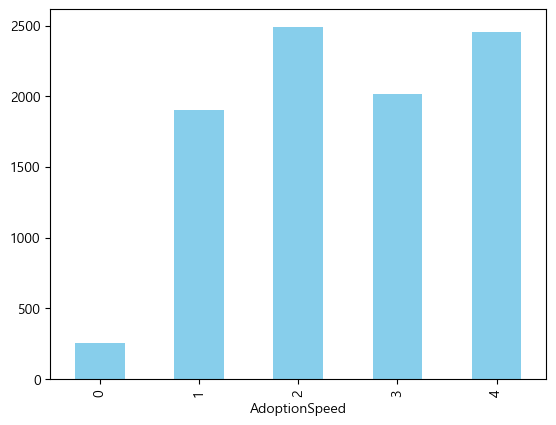

In [21]:
train['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', color='skyblue')

## 1. 범주형 데이터 처리

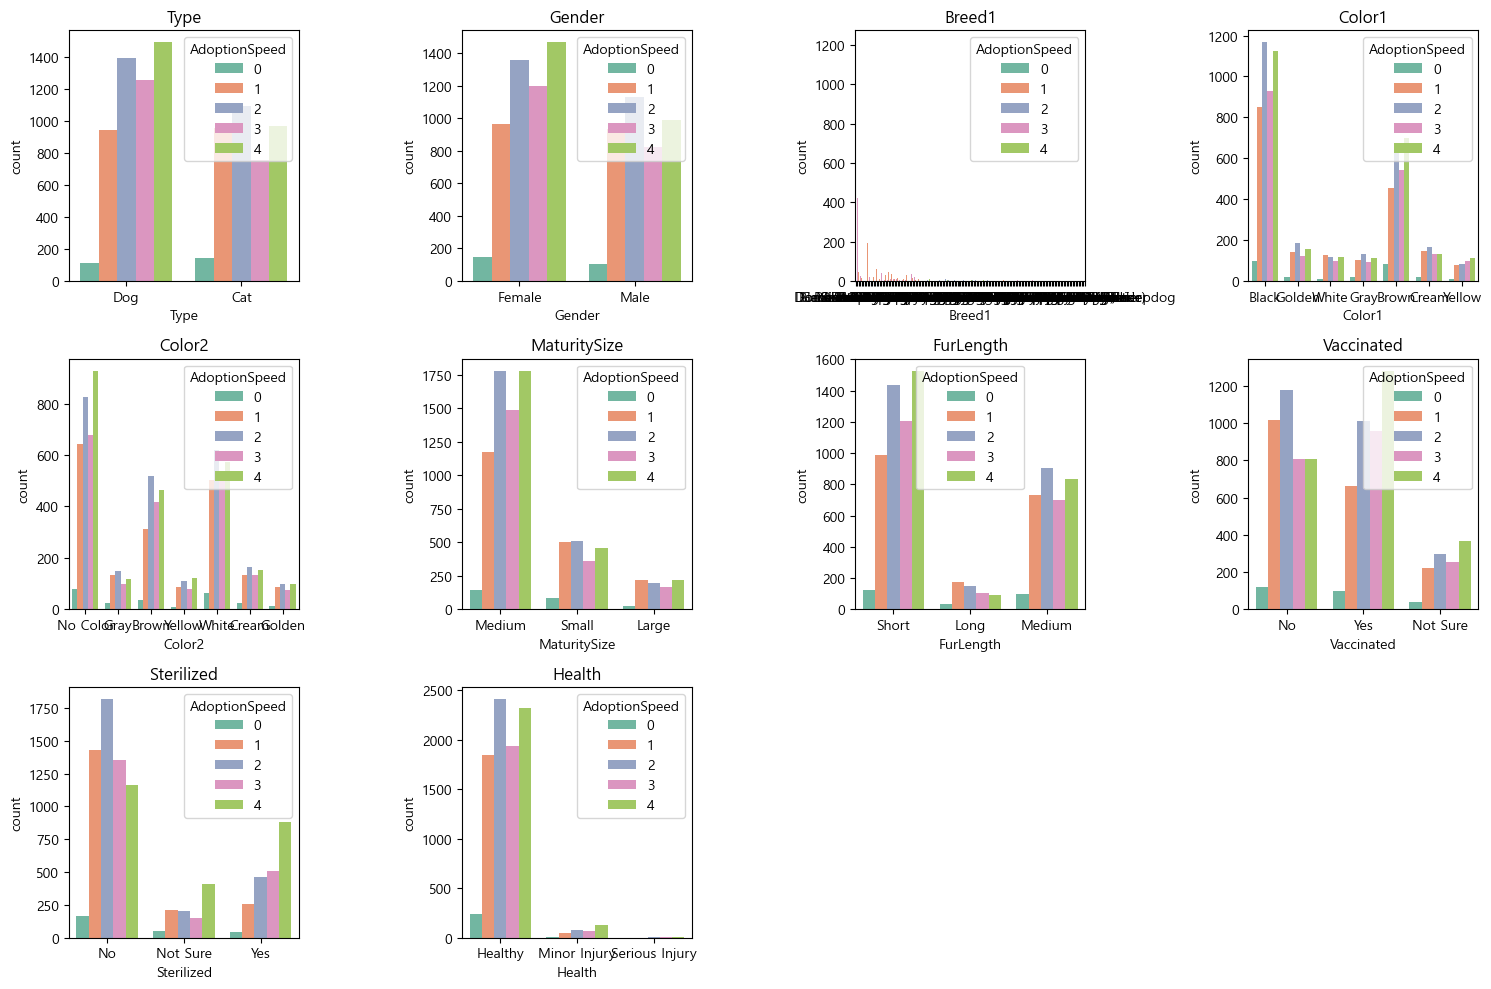

Type의 p-value: 1.830878795613804e-20
Gender의 p-value: 2.324312914267508e-09
Breed1의 p-value: 2.1383297936928263e-34
Color1의 p-value: 8.617610090560279e-05
Color2의 p-value: 2.4041908229192468e-05
MaturitySize의 p-value: 1.9182840088285824e-20
FurLength의 p-value: 7.62375322915223e-21
Vaccinated의 p-value: 2.9835305267555037e-43
Sterilized의 p-value: 8.946449895328545e-118
Health의 p-value: 4.755722195674049e-05


In [193]:
from scipy.stats import chi2_contingency

categorical_features = ["Type", "Gender", "Breed1", "Color1", "Color2", "MaturitySize", "FurLength", "Vaccinated", "Sterilized", "Health"]

plt.figure(figsize=(15, 10))
for feature in categorical_features:
    plt.subplot(3, 4, categorical_features.index(feature) + 1)
    sns.countplot(data=train, x=feature, hue='AdoptionSpeed', palette='Set2')
    plt.title(feature)

plt.tight_layout()
plt.show()

for feature in categorical_features:
    contingency_table = pd.crosstab(train[feature], train['AdoptionSpeed']) # NaN값 자동 처리
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{feature}의 p-value: {p}")

## 1-1. Breed1 처리

In [174]:
train["Breed1"].value_counts().sort_values(ascending=False)

Breed1
Mixed Breed             3637
Domestic Short Hair     2063
Domestic Medium Hair     699
Tabby                    188
Domestic Long Hair       181
                        ... 
Cymric                     1
Spaniel                    1
English Pointer            1
Welsh Corgi                1
Bedlington Terrier         1
Name: count, Length: 154, dtype: int64

<Axes: xlabel='Breed1', ylabel='count'>

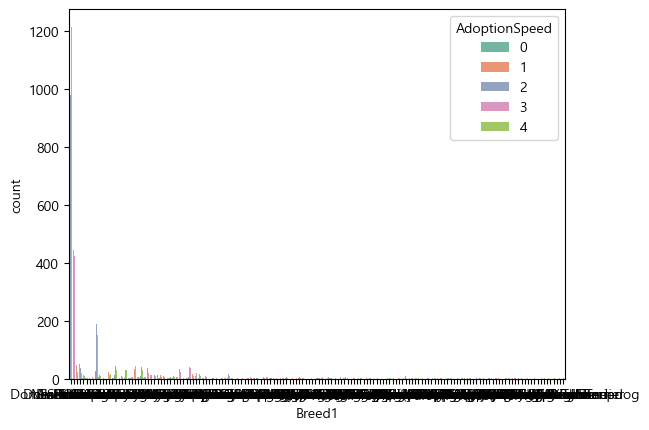

In [194]:
sns.countplot(data=train, x="Breed1", hue='AdoptionSpeed', palette='Set2')

<Axes: xlabel='Breed1', ylabel='count'>

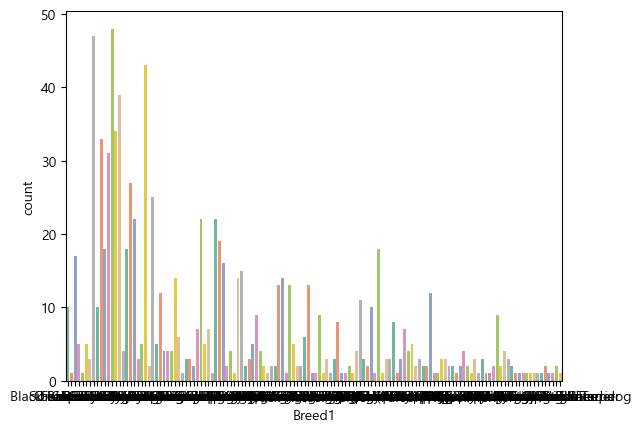

In [195]:
a = train['Breed1'].value_counts()[train['Breed1'].value_counts() < 50]
sns.countplot(data=train[train['Breed1'].isin(a.index)], x="Breed1", palette='Set2')

## 2-2. Color

In [83]:
train["Color1"].value_counts()

Color1
Black     4168
Brown     2412
Golden     630
Cream      597
White      467
Gray       463
Yellow     381
Name: count, dtype: int64

In [84]:
train["Color2"].value_counts()

Color2
No Color    3153
White       2295
Brown       1747
Cream        613
Gray         526
Yellow       413
Golden       371
Name: count, dtype: int64

In [91]:
train[train['Color1'] == "Yellow"]['Color2'].value_counts()

Color2
White       177
No Color    121
Cream        63
Gray         20
Name: count, dtype: int64

## 2-3. Vaccinated, Sterilized

In [229]:
train['Vaccinated'] = train['Vaccinated'].str.replace('Not Sure', 'No', regex=False)
train['Sterilized'] = train['Sterilized'].str.replace('Not Sure', 'No', regex=False)
train['MaturitySize'] = test['MaturitySize'].str.replace('Medium', 'Large', regex=False)
train['FurLength'] = train['FurLength'].str.replace('Medium', 'Long', regex=False)
train['Health'] = train['Health'].str.replace('Minor Injury', 'Not Healthy', regex=False)
train['Health'] = train['Health'].str.replace('Serious Injury', 'Not Healthy', regex=False)

train

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,AdoptionSpeed
0,Dog,3,Mixed Breed,Female,Black,No Color,Large,Short,No,No,Healthy,0,1,4
1,Cat,3,Domestic Short Hair,Male,Black,Gray,Small,Short,No,No,Healthy,0,3,4
2,Cat,1,Domestic Short Hair,Male,Black,Brown,Large,Short,Yes,No,Healthy,0,2,1
3,Cat,2,Domestic Short Hair,Male,Golden,Yellow,Small,Short,No,No,Healthy,0,5,1
4,Cat,2,Domestic Short Hair,Male,White,No Color,Large,Short,No,No,Healthy,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113,Cat,2,Domestic Short Hair,Male,Golden,White,NaN,Short,No,No,Healthy,0,4,1
9114,Cat,5,Domestic Short Hair,Female,Black,Gray,NaN,Short,No,No,Healthy,0,5,2
9115,Cat,3,Calico,Female,Black,Yellow,NaN,Long,Yes,No,Healthy,0,2,2
9116,Dog,8,Mixed Breed,Male,Brown,No Color,NaN,Long,Yes,Yes,Healthy,0,2,3


<Axes: xlabel='FurLength', ylabel='count'>

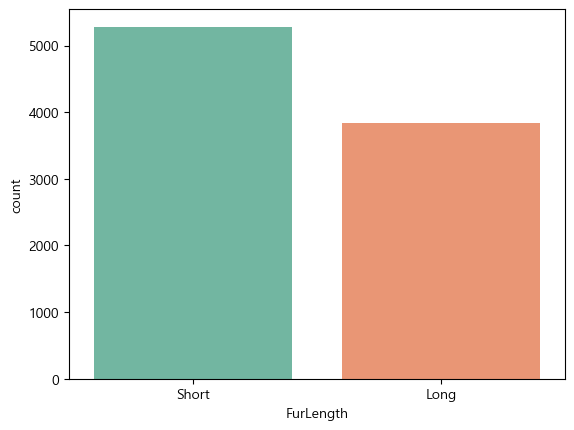

In [231]:
sns.countplot(x='FurLength', data=train, palette='Set2')

# 3. 수치형 데이터 처리

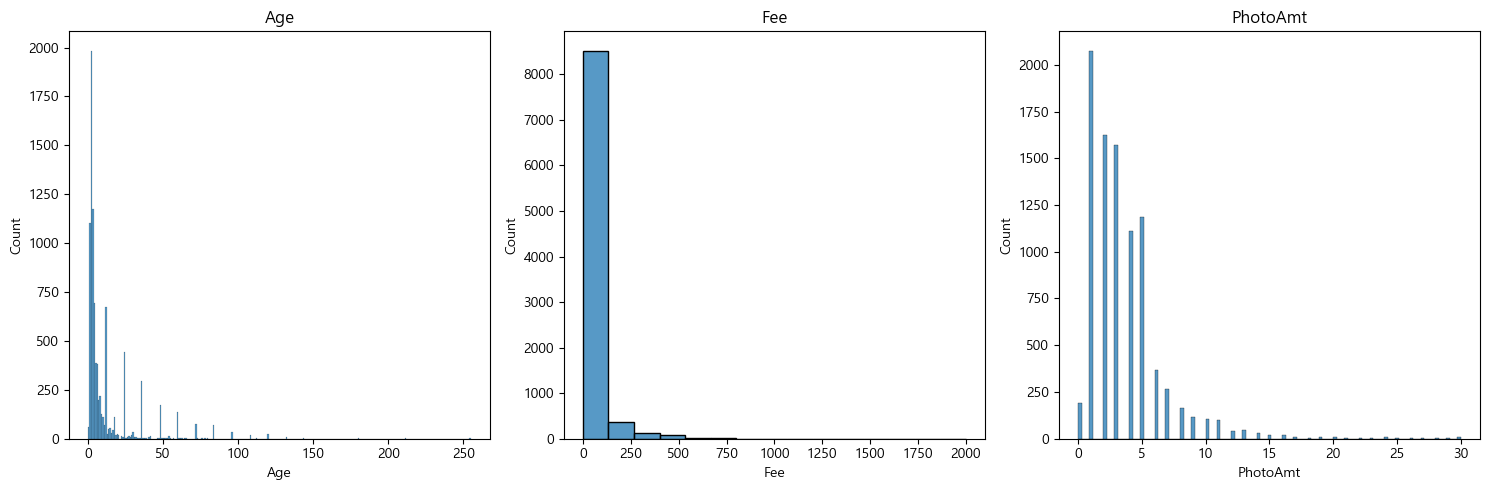

In [69]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numeric_features = ['Age', 'Fee', 'PhotoAmt']

plt.figure(figsize=(15, 5))
for feature in numeric_features:
    plt.subplot(1, 3, numeric_features.index(feature) + 1)
    sns.histplot(data=train, x=feature, palette='Set2')
    plt.title(feature)

plt.tight_layout()
plt.show()

In [98]:
train['Age'].describe()

count    9118.000000
mean       11.860715
std        19.647651
min         0.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       255.000000
Name: Age, dtype: float64

In [2]:
train['Age'].sort_values().value_counts()

Age
2     1984
3     1175
1     1101
4      694
12     673
      ... 
85       1
74       1
81       1
75       1
89       1
Name: count, Length: 100, dtype: int64

In [3]:
train['Age'] = train['Age'] // 12
train['Age'].sort_values().value_counts()

Age
0     6515
1     1069
2      557
3      341
4      211
5      154
6       90
7       78
8       36
10      24
9       21
11       9
12       4
15       2
17       2
21       2
13       1
14       1
19       1
Name: count, dtype: int64

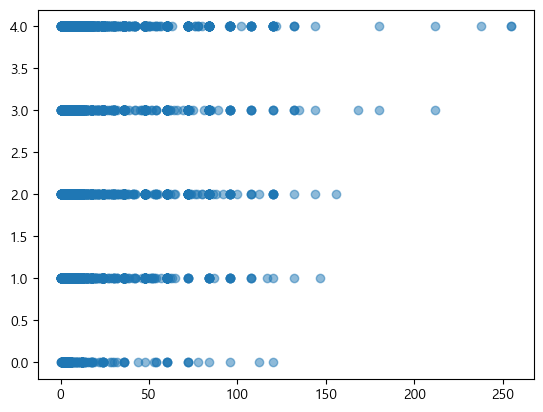

In [136]:
plt.plot(train['Age'], train['AdoptionSpeed'], 'o', alpha=0.5)

In [150]:
train['Age'] = train['Age'].apply(lambda x: 100 if x > 100 else x)
train['Age'].sort_values().value_counts()

Age
2     1984
3     1175
1     1101
4      694
12     673
      ... 
75       1
45       1
44       1
69       1
74       1
Name: count, Length: 84, dtype: int64

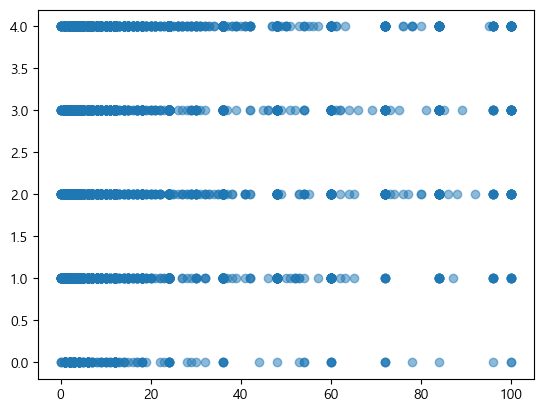

In [152]:
plt.plot(train['Age'], train['AdoptionSpeed'], 'o', alpha=0.5)

In [ ]:
numeric_features = ['Age', 'Fee', 'PhotoAmt']

for feature in numeric_features:
    stanard_scaler = StandardScaler()
    train[feature] = stanard_scaler.fit_transform(train[[feature]])
    test[feature] = stanard_scaler.transform(test[[feature]])

# 모델 전처리 및 학습

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import torch
import optuna

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder,  MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import root_mean_squared_error, f1_score, accuracy_score

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop(['Breed1'], axis=1, inplace=True)
test.drop(['Breed1'], axis=1, inplace=True)
# train.drop(['Gender'], axis=1, inplace=True)
# test.drop(['Gender'], axis=1, inplace=True)

# train['Vaccinated'] = train['Vaccinated'].str.replace('Not Sure', 'No', regex=False)
# train['Sterilized'] = train['Sterilized'].str.replace('Not Sure', 'No', regex=False)
# train['MaturitySize'] = train['MaturitySize'].str.replace('Medium', 'Large', regex=False)
# train['FurLength'] = train['FurLength'].str.replace('Medium', 'Long', regex=False)
# train['Health'] = train['Health'].str.replace('Minor Injury', 'Not Healthy', regex=False)
# train['Health'] = train['Health'].str.replace('Serious Injury', 'Not Healthy', regex=False)

# test['Vaccinated'] = test['Vaccinated'].str.replace('Not Sure', 'No', regex=False)
# test['Sterilized'] = test['Sterilized'].str.replace('Not Sure', 'No', regex=False)
# test['MaturitySize'] = test['MaturitySize'].str.replace('Medium', 'Large', regex=False)
# test['FurLength'] = test['FurLength'].str.replace('Medium', 'Long', regex=False)
# test['Health'] = test['Health'].str.replace('Minor Injury', 'Not Healthy', regex=False)
# test['Health'] = test['Health'].str.replace('Serious Injury', 'Not Healthy', regex=False)

In [ ]:
categorical_features = ["Color1", "Color2", "MaturitySize", "FurLength", "Vaccinated", "Sterilized", "Health", "Type", "Gender"]

for feature in categorical_features:
    encoders = LabelEncoder()
    train[feature] = encoders.fit_transform(train[feature].astype(str))
    test[feature] = encoders.fit_transform(test[feature].astype(str))

numeric_features = ['Age', 'Fee', 'PhotoAmt']

for feature in numeric_features:
    stanard_scaler = StandardScaler()
    train[feature] = stanard_scaler.fit_transform(train[[feature]])
    test[feature] = stanard_scaler.transform(test[[feature]])

    # norm_scaler = MinMaxScaler()
    # train[feature] = norm_scaler.fit_transform(train[[feature]])
    # test[feature] = norm_scaler.transform(test[[feature]])

In [177]:
X_train = train.drop(columns=['AdoptionSpeed'])
y_train = train['AdoptionSpeed']

# Optuna - XGBoost (n_estimators 고정)
def objective_xgb(trial):
    model = XGBClassifier(
        n_estimators=500,  # 고정
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
        max_depth=trial.suggest_int('max_depth', 3, 30),
        min_child_weight=trial.suggest_int('min_child_weight', 1, 10),
        subsample=trial.suggest_float('subsample', 0.5, 1.0),
        colsample_bytree=trial.suggest_float('colsample_bytree', 0.5, 1.0),
        reg_alpha=trial.suggest_float('reg_alpha', 0.0, 1.0),
        reg_lambda=trial.suggest_float('reg_lambda', 0.0, 1.0),
        random_state=42,
        n_jobs=-1
    )
    return cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1).mean()

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)

xgb_model = XGBClassifier(**study_xgb.best_params, n_estimators=500, random_state=42, n_jobs=-1)

[I 2025-05-28 21:15:27,031] A new study created in memory with name: no-name-4fcc09ed-202f-4d26-9b23-a48354a2543e
[I 2025-05-28 21:15:32,674] Trial 0 finished with value: -1.0693114780918287 and parameters: {'learning_rate': 0.27207863589032405, 'max_depth': 25, 'min_child_weight': 7, 'subsample': 0.8208110203275978, 'colsample_bytree': 0.9734548921091766, 'reg_alpha': 0.7129249672917678, 'reg_lambda': 0.3594573928144008}. Best is trial 0 with value: -1.0693114780918287.
[I 2025-05-28 21:15:35,369] Trial 1 finished with value: -0.9789423160204406 and parameters: {'learning_rate': 0.11299664787519505, 'max_depth': 4, 'min_child_weight': 9, 'subsample': 0.9915053670684824, 'colsample_bytree': 0.9122257923408539, 'reg_alpha': 0.7585198889310907, 'reg_lambda': 0.12467683895433546}. Best is trial 1 with value: -0.9789423160204406.
[I 2025-05-28 21:15:40,190] Trial 2 finished with value: -1.0376178291999885 and parameters: {'learning_rate': 0.11207915467028304, 'max_depth': 6, 'min_child_wei

In [ ]:
# 학습 및 예측
xgb_model.fit(X_train, y_train)
test_preds = xgb_model.predict(test)

# 결과 저장
submission_voting = pd.DataFrame({'prediction': test_preds})
submission_voting.to_csv('xgb_submission_30.csv', index=False)

print("✅ 'xgb_submission_30.csv' 저장됨.")

✅ 'voting_submission.csv' 저장됨.


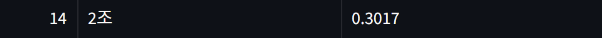

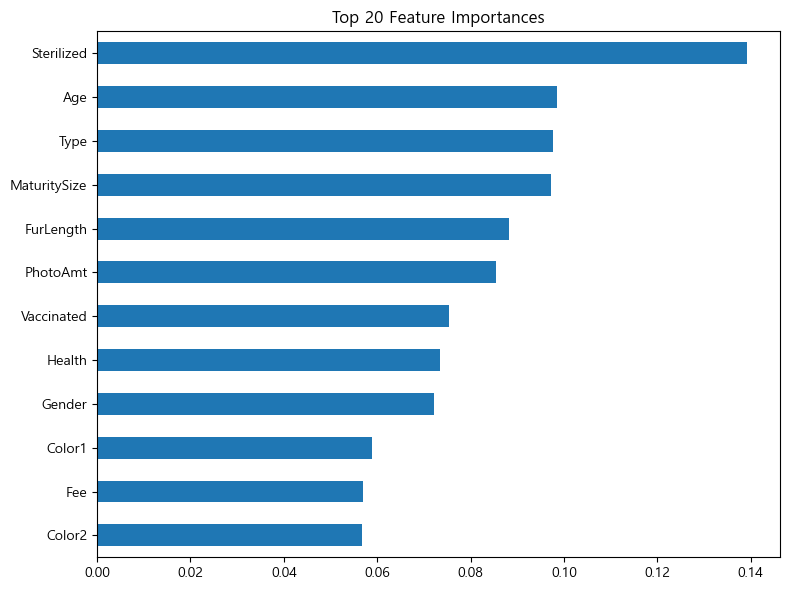

In [179]:
# Feature Importance 시각화
importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(8, 6), title="Top 20 Feature Importances")
plt.tight_layout()
plt.show()